# Desafío spike

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1. Costos marginales

In [2]:
costo_marginal_real = pd.read_csv('costo_marginal_real.csv')

In [3]:
costo_marginal_real.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [4]:
costo_marginal_real.shape

(4309951, 7)

In [5]:
# Quitar filas sin fecha, hora o costo
costo_marginal_real.dropna(subset=['fecha', 'hora', 'costo_en_dolares', 'costo_en_pesos'], inplace=True)

In [6]:
# Quitar columnas que no se usarán
costo_marginal_real.drop(columns=['nombre'], inplace=True)

In [7]:
costo_marginal_real.shape

(4309951, 6)

In [8]:
# Encontrar barras con costo real.
barras_costo_real = costo_marginal_real['barra_mnemotecnico'].unique()

In [9]:
costo_marginal_programado = pd.read_csv('costo_marginal_programado.csv')

In [10]:
costo_marginal_programado.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [11]:
costo_marginal_programado.shape

(1192124, 5)

In [12]:
# Quitar filas sin fecha, hora o costo
costo_marginal_programado.dropna(subset=['fecha', 'hora', 'costo'], inplace=True)

In [13]:
costo_marginal_programado.shape

(1192124, 5)

In [14]:
barras_costo_programado = costo_marginal_programado['mnemotecnico_barra'].unique()

In [15]:
# Quitar columnas que no se usarán
costo_marginal_programado.drop(columns=['nombre_barra'], inplace=True)

In [16]:
costo_marginal_programado.shape

(1192124, 4)

In [17]:
# Por problemas de memoria al unir las bases de costos reales y programados, eliminar barras sin costo programado.
costo_marginal_real = costo_marginal_real[costo_marginal_real['barra_mnemotecnico'].isin(costo_marginal_programado['mnemotecnico_barra'])]

In [18]:
costo_marginal_real.shape

(929729, 6)

In [19]:
# Encontrar barras con costo real y programado.
barras_costo_real_y_programado = costo_marginal_real['barra_mnemotecnico'].unique()

In [20]:
# Unir bases
costo_marginal = pd.merge(costo_marginal_real, costo_marginal_programado, how='inner', left_on=['barra_mnemotecnico', 'fecha', 'hora'], right_on=['mnemotecnico_barra', 'fecha', 'hora'])

In [21]:
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,mnemotecnico_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA01G021SE018G021,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA01T018SE001T018,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA02T005SE055T005,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA01T002SE029T002,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA01R002SE041R002,56.086260


In [22]:
costo_marginal.shape

(913388, 8)

In [23]:
# Calcular numero de filas con barra, fecha y hora duplicadas
costo_marginal[['barra_mnemotecnico', 'fecha', 'hora']].duplicated().sum()

12459

In [24]:
# Quitar columnas duplicadas y que no se usarán.
costo_marginal = costo_marginal.drop(columns=['mnemotecnico_barra'])

In [25]:
costo_marginal.shape

(913388, 7)

In [26]:
# Calcular uso de memoria en MB
def memory_in_mb(df):
    return df.memory_usage().sum() / 1e6

In [27]:
memory_in_mb(costo_marginal)

47.496176

In [28]:
# Renombrar columnas
costo_marginal.rename(columns={'costo_en_dolares': 'costo_real_dolares', 
                               'costo_en_pesos': 'costo_real_pesos',
                               'costo': 'costo_programado_pesos'},
                      inplace=True, errors='ignore')

In [29]:
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_real_dolares,costo_real_pesos,costo_programado_pesos
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,56.086260


In [30]:
# Convertir a fecha
costo_marginal['fecha'] = pd.to_datetime(costo_marginal['fecha']) + costo_marginal['hora'] * pd.Timedelta(1, unit='h')

In [31]:
# Encontrar fechas máxima y mínima
print(np.min(costo_marginal['fecha']))
print(np.max(costo_marginal['fecha']))

2019-01-01 01:00:00
2019-07-01 00:00:00


## 1.1 Algunos hallazgos

In [32]:
# Calcular estadísticas de resumen
costo_marginal.describe()

,hora,costo_real_dolares,costo_real_pesos,costo_programado_pesos
count,913388.000000,913388.000000,913388.000000,913388.000000
mean,12.502901,58.566654,39.512227,61.888004
std,6.924006,23.276453,15.555780,23.806896
min,1.000000,0.000000,0.000000,-12.113677
25%,7.000000,48.440000,32.559880,49.981588
50%,13.000000,53.330000,35.965290,55.057527
75%,19.000000,60.890000,41.258260,64.181228
max,25.000000,791.140000,523.418220,610.600000


A continuación algunas observaciones sobre las variables:
- La variable hora tiene un rango de 1 a 25, pero debeía tener un rango de 1 a 24. Es posible que hora 25 signifique 1 y provenga de un error. 
- El costo real en (en pesos y dólares) tiene por lo menos un extremo muy alejado del percentil 75. Estos extremos podrían corresponder a algún error de medida o a accidentes, o a fechas especiales.
- El costo programado toma valores negativos en algunas ocasiones. Esto parece extraño al pensar en costos, por lo cual los datos podrían estar errados. Sin embargo, esto también podría significar que para ciertas fechas se esperaba un ahorro o una ganacia.
- Las medidas estadísticas descriptivas sugieren que el costo programado es en general mayor al costo real, lo que sugiere que el sistema electrico es conservador en cuanto a la forma en que programa sus costos.

In [33]:
# Mostrar número de barras con costos real y  programado (para por lo menos una fecha hora).
num_barras_costo_real = barras_costo_real.shape[0]
num_barras_costo_real_y_programado = barras_costo_real_y_programado.shape[0]
print("Número de barras con costo real: {}".format(num_barras_costo_real))
print("Número de barras con costo real y programado: {}".format(num_barras_costo_real_y_programado))
print("Porcentaje de barras con programado: {}%".format(round(
    num_barras_costo_real_y_programado / num_barras_costo_real * 100)))

Número de barras con costo real: 1020
Número de barras con costo real y programado: 220
Porcentaje de barras con programado: 22%


De todas las barras presentadas en la base de costos marginales reales, solamente el 22% se encuentran también en la base de costos marginales programados y tienen un costo para por lo menos una combinación de fecha y hora.

# 2. Construcción de variables

In [34]:
costo_marginal['desviacion'] = costo_marginal['costo_real_pesos'] - costo_marginal['costo_programado_pesos']

In [35]:
costo_marginal['desviacion_pct'] = (
    costo_marginal['costo_real_pesos'] - costo_marginal['costo_programado_pesos']) / costo_marginal['costo_programado_pesos']

In [36]:
costo_marginal['desviacion_cat'] = costo_marginal['desviacion_pct'].apply(lambda x: 1 if abs(x) > 0.15 else 0)

In [37]:
costo_marginal.shape

(913388, 10)

In [38]:
# Describir la variable desviacion_cat
costo_marginal['desviacion_cat'].describe()

count    913388.000000
mean          0.959616
std           0.196858
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: desviacion_cat, dtype: float64

Como se puede ver en la tabla anterior, el porcentaje de observaciones con una desviacion_cat > 15% es 96% (mean = 0.959616) 

In [39]:
# Obtener una muestra de 10 observaciones
costo_marginal.sample(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_real_dolares,costo_real_pesos,costo_programado_pesos,desviacion,desviacion_pct,desviacion_cat
7715,BA85L123SE103L123,BA02T002SE032T002,2019-02-26 01:00:00,1,56.82,37.01028,78.332169,-41.321889,-0.527521,1
402864,BA03G010SE054G010,BA02T002SE032T002,2019-05-05 11:00:00,11,41.52,28.37103,50.514631,-22.143601,-0.438360,1
370428,BA52G216SE023G216,BA02T002SE032T002,2019-05-31 10:00:00,10,41.14,29.13535,39.393043,-10.257693,-0.260394,1
103810,BA44T025SE121T025,BA02T002SE032T002,2019-05-30 03:00:00,3,45.87,32.26863,47.531515,-15.262885,-0.321111,1
619839,BA01T003SE005T003,BA02T002SE032T002,2019-03-13 17:00:00,17,116.29,77.84104,119.234217,-41.393177,-0.347159,1
593420,BA02T005SE170T005,BA02T002SE032T002,2019-05-06 16:00:00,16,67.44,46.08243,65.215869,-19.133439,-0.293386,1
2582,BA02T005SE170T005,BA02T002SE032T002,2019-02-03 01:00:00,1,39.93,26.26635,45.423346,-19.156996,-0.421743,1
281196,BA01R002SE004R002,BA02T002SE032T002,2019-03-30 08:00:00,8,55.27,37.64384,55.395079,-17.751239,-0.320448,1
490131,BA68T005SE277T005,BA02T002SE032T002,2019-01-02 13:00:00,13,50.28,34.97929,70.625713,-35.646423,-0.504723,1
266036,BA56G216SE023G216,BA02T002SE032T002,2019-01-21 07:00:00,7,63.43,42.58500,109.814300,-67.229300,-0.612209,1


In [40]:
costo_marginal_group_fecha = costo_marginal.groupby('fecha', as_index=False)

In [41]:
mean_desviacion_cat = costo_marginal_group_fecha['desviacion_cat'].agg('mean')

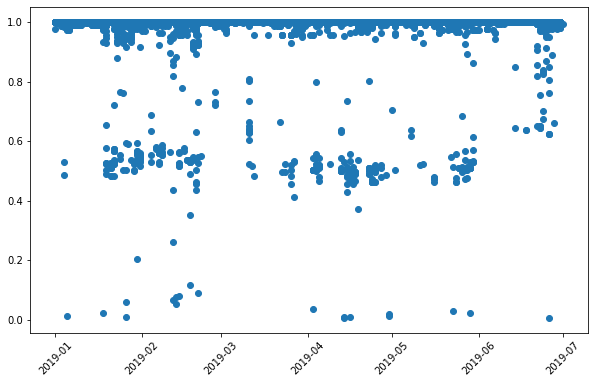

In [42]:
# Graficar el porcentaje de desviaciones mayores a 15% ocurridas en cada fecha
fig = plt.figure(figsize=(10, 6))
plt.scatter(mean_desviacion_cat['fecha'].dt.date, mean_desviacion_cat['desviacion_cat'])
plt.xticks(rotation=45)
plt.show()

En la gráfica anterior, cada punto representa el porcentaje de barras en las que se presentó una desviación mayor a 15%, para una hora determinada de una fecha determinada.
- En general, la mayoría de las horas de cualquier fecha presentan un porcentaje de barras con desviación significativa. Es decir, en general, para una fecha dada la mayoría de las barras presentan una desviación significativa durante la mayor parte del día.

# 3. Visualización de variables

In [43]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    fecha_inicial = pd.to_datetime(fecha_inicial)
    fecha_final = pd.to_datetime(fecha_final)
    datos_barra = costo_marginal[costo_marginal['barra_mnemotecnico'] == codigo_barra]
    datos_barra = datos_barra[(datos_barra['fecha'] >= fecha_inicial) & (datos_barra['fecha'] <= fecha_final)]
    datos_barra.sort_values('fecha', inplace=True)
    fechas = datos_barra['fecha'].values
    cmg_prog = datos_barra['costo_programado_pesos'].values
    cmg_real = datos_barra['costo_real_pesos'].values
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fechas, cmg_prog)
    plt.plot(fechas, cmg_real)
    plt.title('Costos ' + codigo_barra)
    plt.legend(['cmg_prog', 'cmg_real'])
    plt.xticks(rotation=45)
    plt.show()

In [44]:
muestra_barras = np.random.choice(costo_marginal['barra_mnemotecnico'], 20)

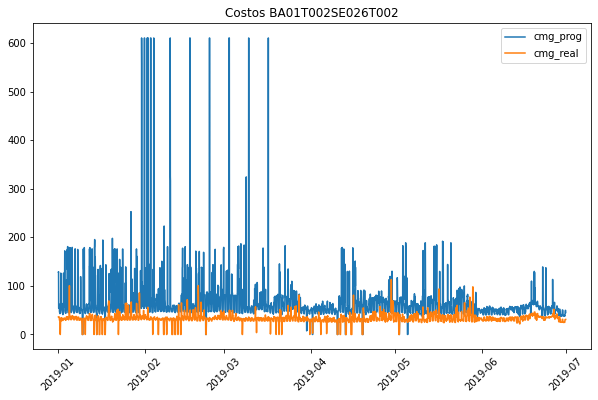

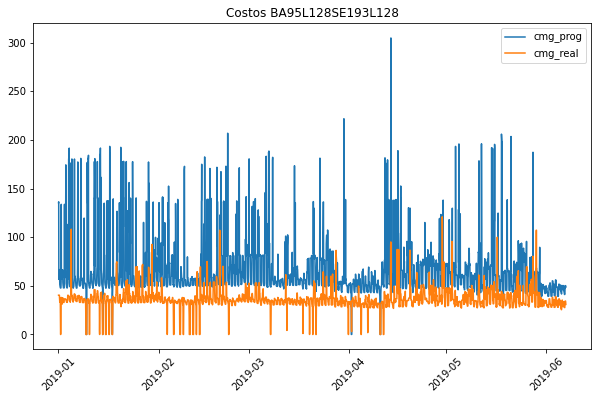

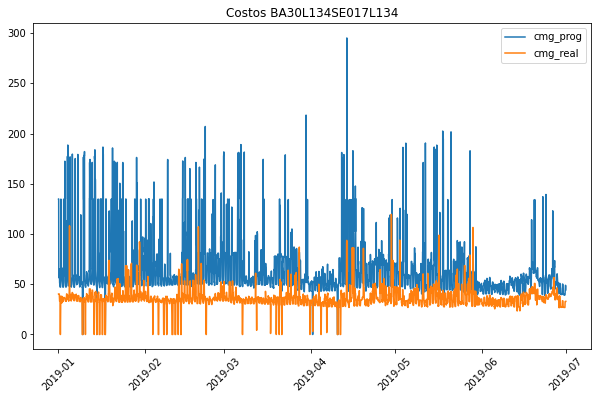

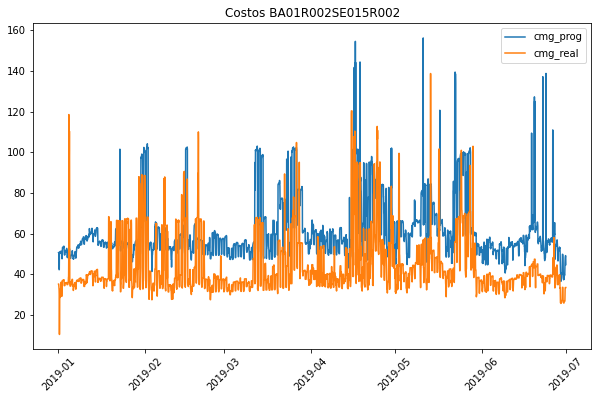

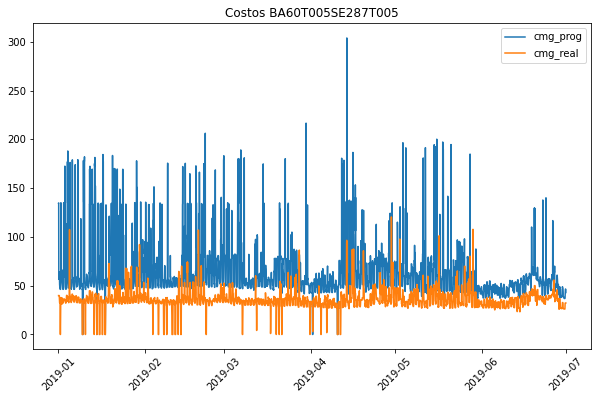

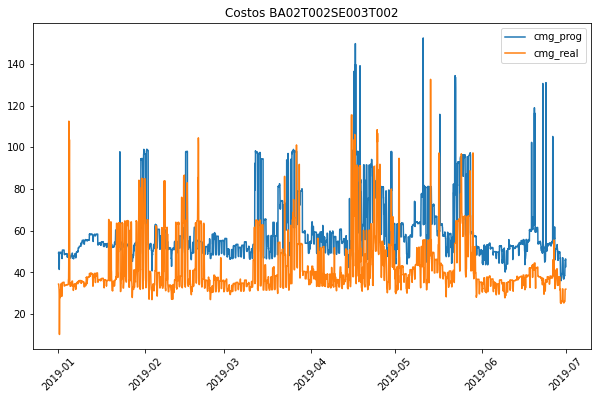

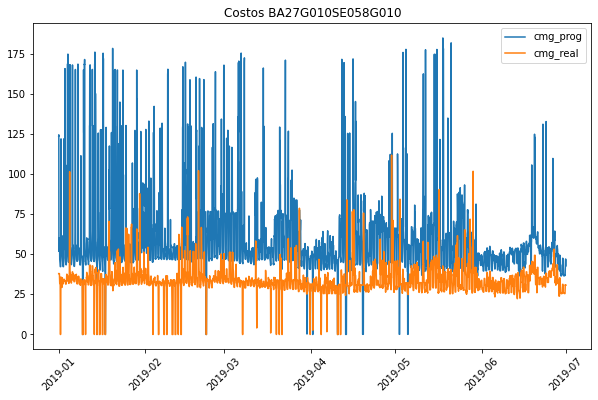

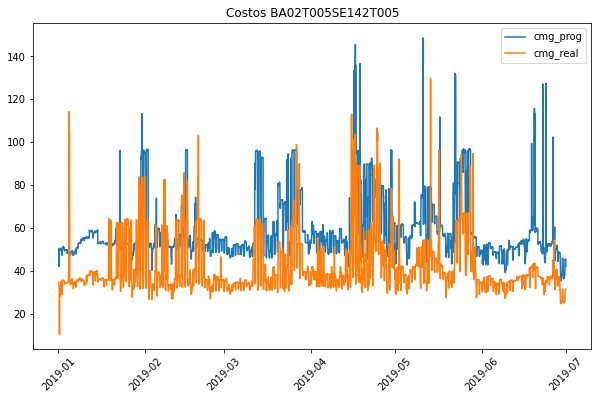

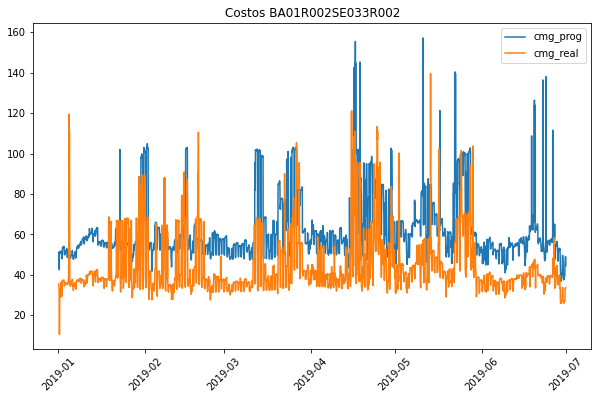

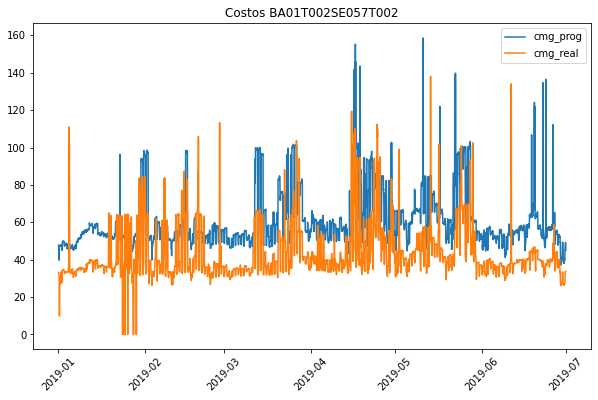

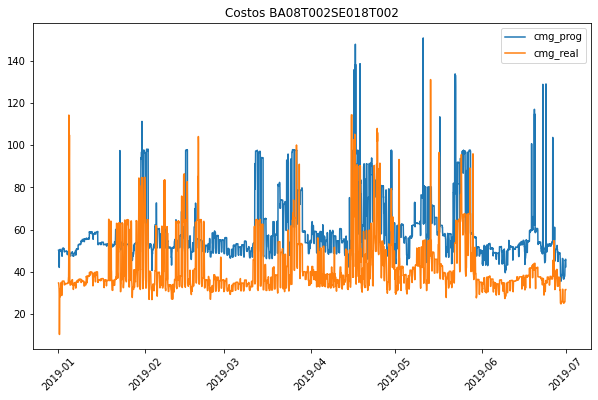

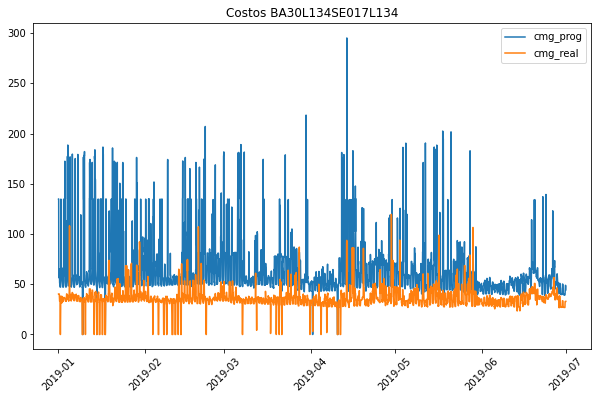

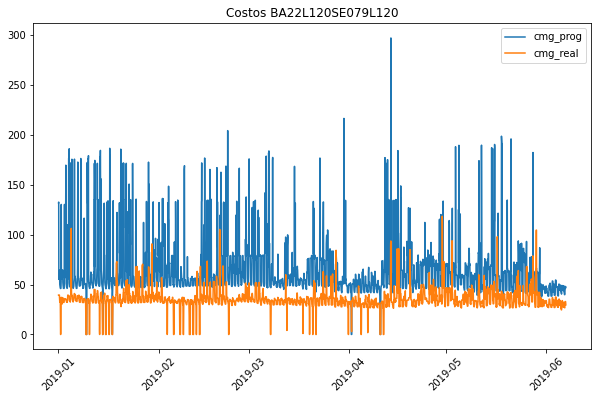

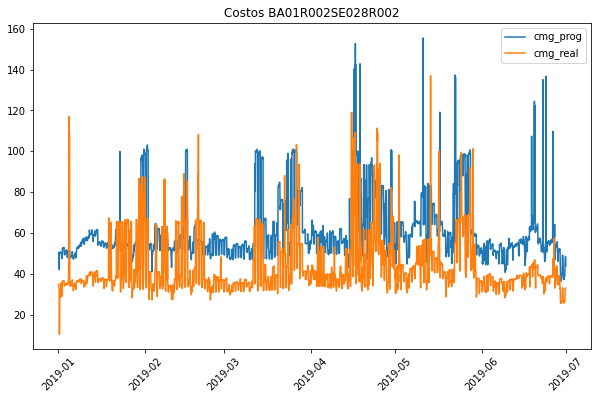

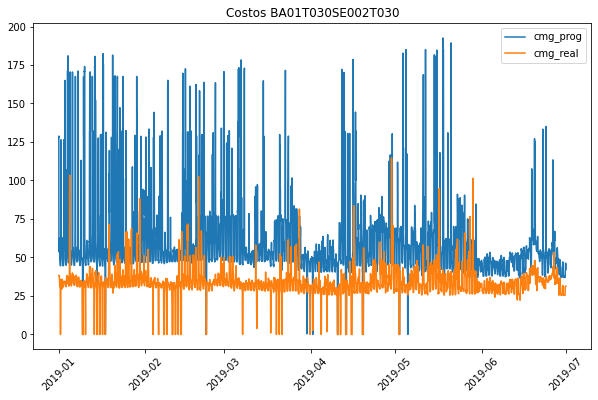

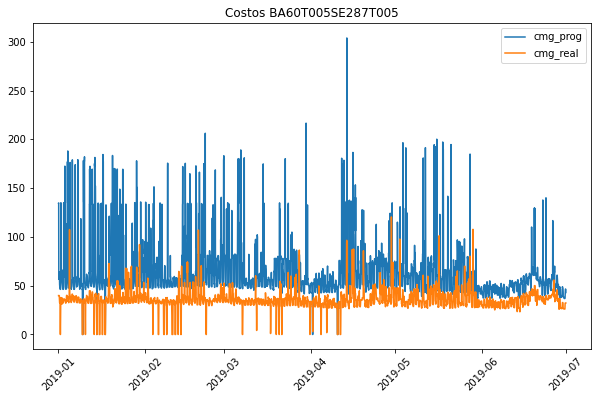

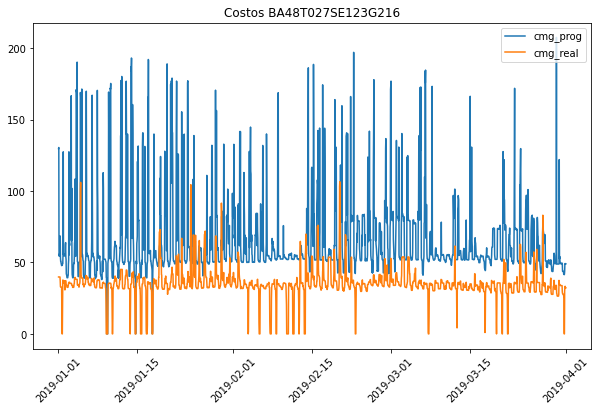

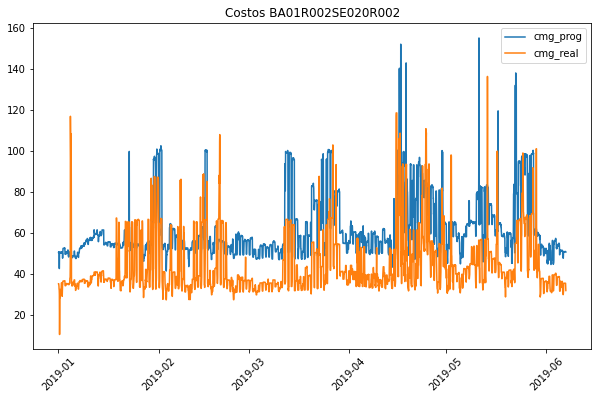

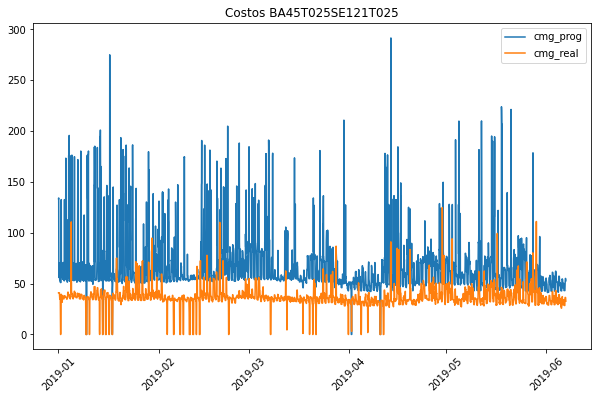

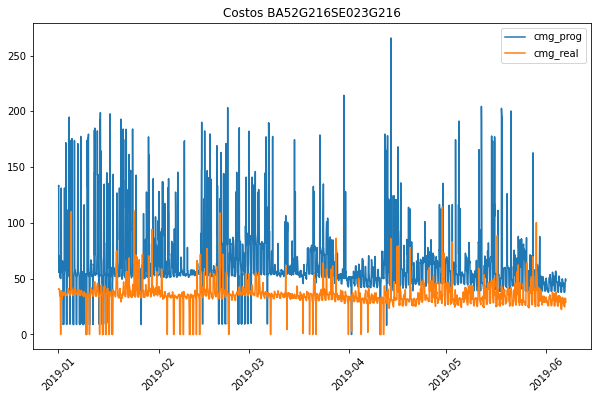

In [45]:
for barra in muestra_barras:
    time_plot_costo_barra(barra, '2019-01-01', '2019-07-01')

- Las gráficas confirman la observación de que para la mayoría de fechas y horas, el costo marginal programado cubre el costo marginal real.
- También confirman el hecho de que la desviación porcentual es en general significativa. Para la mayoría de fechas y horas es menor que 15% ya que el costo marginal real es bastante menor que el programado.

In [46]:
# Encontrar barras con costo real = 0 durante todos los días
costo_marginal_barra = costo_marginal.groupby('barra_mnemotecnico')

In [47]:
costos_extremos_barra = costo_marginal_barra['costo_real_pesos'].agg(['min', 'max'])

In [48]:
costos_extremos_barra[costos_extremos_barra['max'] == 0]

,min,max
barra_mnemotecnico,,
BA01G049SE001G049,0.0,0.0


In [49]:
costos_extremos_barra[costos_extremos_barra['min'] < 0]

,min,max
barra_mnemotecnico,,


La barra BA01G049SE001G049 fue la única que tuvo un costo real de 0 durante todo el periodo.

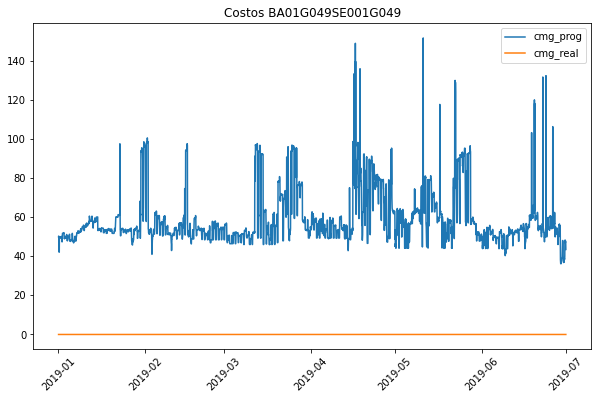

In [50]:
time_plot_costo_barra('BA01G049SE001G049', '2019-01-01', '2019-07-01')

In [51]:
# Eliminar barra
costo_marginal = costo_marginal[costo_marginal['barra_mnemotecnico'] != 'BA01G049SE001G049']

In [52]:
costo_marginal.shape

(909043, 10)

# 4. Base para modelos

In [53]:
base_para_prediccion = pd.read_csv('base_para_prediccion.csv')

In [54]:
base_para_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [55]:
base_para_prediccion.shape

(112779, 15)

In [56]:
# Revisar tipos de datos
base_para_prediccion.dtypes

nemotecnico_se               object
fecha                        object
hora                          int64
gen_eolica_total_mwh        float64
gen_geotermica_total_mwh    float64
gen_hidraulica_total_mwh    float64
gen_solar_total_mwh         float64
gen_termica_total_mwh       float64
cmg_real                    float64
cmg_prog                    float64
cmg_desv                    float64
cmg_desv_pct                float64
n_barras                      int64
demanda_mwh                   int64
cap_inst_mw                 float64
dtype: object

In [57]:
memory_in_mb(base_para_prediccion)

12.631314

- La base tiene 112779 observaciones (filas) y 15 variables (columnas).
- La única variable categórica es nemotecnico_se que identifica la subestación.
- Tiene una variable de fecha (fecha), y una que corresponde a la hora (hora).
- Las dem{as variables son numéricas float, a excepción de las variables de tipo entero n_barras y demanda_mwh.

In [58]:
base_para_prediccion['fecha'] = pd.to_datetime(base_para_prediccion['fecha'])

In [59]:
# Crear variables relacionadas con la fecha
base_para_prediccion['anho'] = base_para_prediccion['fecha'].dt.year
base_para_prediccion['mes'] = base_para_prediccion['fecha'].dt.month
base_para_prediccion['dia'] = base_para_prediccion['fecha'].dt.day
base_para_prediccion['semana_anho'] = base_para_prediccion['fecha'].dt.isocalendar().week.astype(np.int64)
base_para_prediccion['dia_semana'] = base_para_prediccion['fecha'].dt.dayofweek
base_para_prediccion['fin_semana'] = base_para_prediccion['dia_semana'].isin([5, 6])

In [60]:
base_para_prediccion.sample(10).head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,anho,mes,dia,semana_anho,dia_semana,fin_semana
18831,SE005R002,2019-02-25 00:00:00+00:00,12,NaN,NaN,NaN,2.243307,NaN,61.54,59.341832,...,3.710,1,47114761,2.9898,2019,2,25,9,0,False
47873,SE014T002,2019-04-04 00:00:00+00:00,15,NaN,NaN,NaN,0.000000,0.0000,0.00,38.733039,...,-100.005,3,57760864,83.4631,2019,4,4,14,3,False
49968,SE015R002,2019-03-27 00:00:00+00:00,14,NaN,NaN,7.200000,NaN,NaN,81.62,81.713446,...,-0.110,2,8994896,25.9428,2019,3,27,13,2,False
58536,SE020G213,2019-06-20 00:00:00+00:00,24,NaN,NaN,NaN,NaN,554.3397,62.01,60.754519,...,2.070,1,12144314,501.5500,2019,6,20,25,3,False
94069,SE082T005,2019-03-14 00:00:00+00:00,10,NaN,NaN,3.192825,NaN,0.0000,86.04,84.691725,...,1.590,3,10523217,13.4160,2019,3,14,11,3,False


In [61]:
def plot_variable_subestacion_fechas(subestacion, variable, fechas):
    fechas = [pd.to_datetime(fecha, utc=True) for fecha in fechas]
    datos_filtrados = base_para_prediccion[(base_para_prediccion['nemotecnico_se'] == subestacion) &
                                           (base_para_prediccion['fecha'].isin(fechas))][['fecha', 'hora', variable]]
    #import ipdb; ipdb.set_trace()
    fig = plt.figure(figsize=(10, 6))
    for fecha in fechas:
        datos_plot = datos_filtrados[datos_filtrados['fecha'] == fecha].sort_values('hora')
        horas = datos_plot['hora'].values
        values = datos_plot[variable].values
        plt.plot(horas, values)
    plt.title('Perfiles diarios de generacion para ' + variable)
    plt.legend([fecha.date() for fecha in fechas])
    plt.show()

In [62]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']

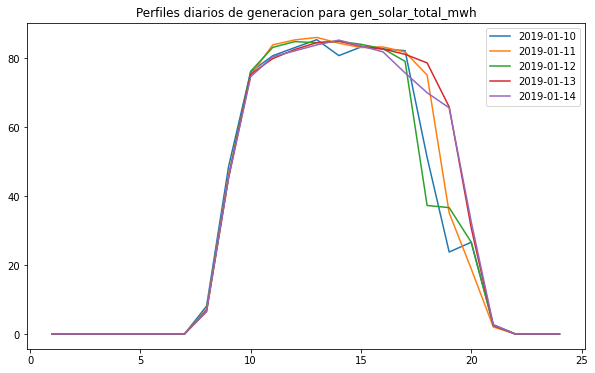

In [63]:
plot_variable_subestacion_fechas('SE005T002', 'gen_solar_total_mwh', fechas)

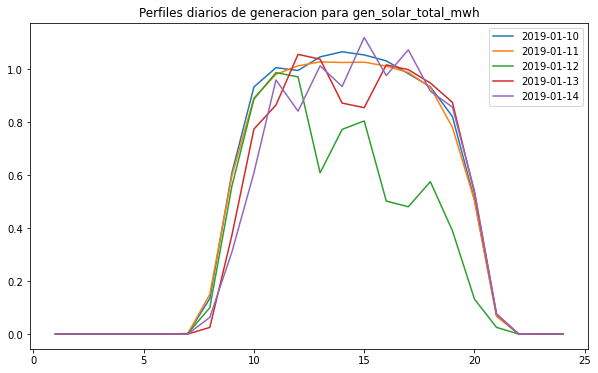

In [64]:
plot_variable_subestacion_fechas('SE127T005', 'gen_solar_total_mwh', fechas)

Con base en los anteriores gráficos, se puede decir que:
- La generación solar ocurre aproximadamente entre las 7am y las 10pm.
- La máxima generación en mwh ocurre en general a partir de las 10am y las 3pm.
- En la subestación SE005T002, la generación solar parece estable en las fechas dadas.
- En la subestación SE127T005, la generación solar no es tan estable en las fechas dadas. En especial, para 2019-01-12 la generación fue en general menor que para las demás fechas.
- En SE127T005 la generación es mucho menor que en SE005T002. El máximo generado es cerca de 1 mwh vs. aproximadamente 80 mwh en SE005T002.
- Al parecer entre más generación, más estable es la cantidad generada al comparar las diferentes fechas.
- En 2019-01-12 hubo menos generación en ambas subestaciones.

In [65]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']

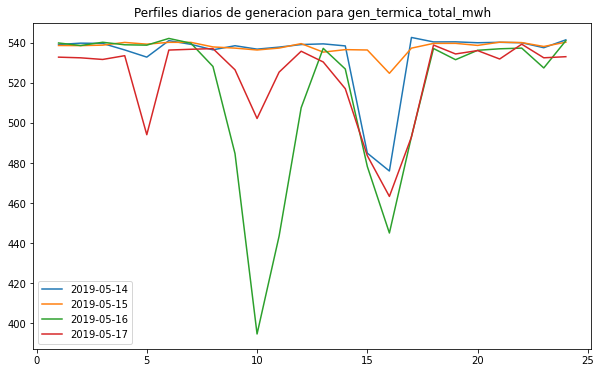

In [66]:
plot_variable_subestacion_fechas('SE020G213', 'gen_termica_total_mwh', fechas)

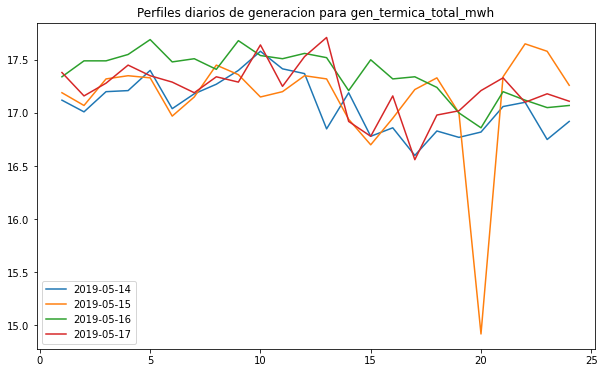

In [67]:
plot_variable_subestacion_fechas('SE106G216', 'gen_termica_total_mwh', fechas)

Con base en los anteriores gráficos, se puede decir que:
- La generación térmica ocurre en general durante todo el día.
- Hay picos de reducción en la generación en ambas subestaciones.
- En general la generación es menos estable que la solar durante las horas de sol.
- En SE106G216 la generación es mucho menor que en SE020G213. El máximo generado es cerca de 17.5 mwh vs. aproximadamente 540 mwh en SE020G213.
- Al parecer entre más generación, más estable es la cantidad generada al comparar las diferentes fechas.

# 5. Prediccion de desviación

In [68]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [69]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [70]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, r2_score

In [71]:
import pickle as pk

In [72]:
# Crear target
base_para_prediccion['target'] = base_para_prediccion['cmg_desv_pct'].apply(lambda x: 1 if abs(x) > 15 else 0)

In [73]:
# Acotar cmg_desv_pct para evitar inf y -inf. 
base_para_prediccion['cmg_desv_pct'] = base_para_prediccion['cmg_desv_pct'].clip(-100, 100)

In [74]:
# Crear variable de generación total
base_para_prediccion['gen_total_mwh'] = base_para_prediccion[['gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh']].sum(axis=1, skipna=True)

In [75]:
# Ordenar base por subestación fecha y hora
base_para_prediccion.sort_values(by=['nemotecnico_se', 'fecha', 'hora'], inplace=True)

In [76]:
# Definir función para crear variables rezagadas agrupadas por subestación
def rezagadas_subestacion(nombre_variable, num_rezagos):
    base_group_subestacion = base_para_prediccion.groupby('nemotecnico_se', as_index=False)[nombre_variable]
    for i in range(num_rezagos):
        nombre_variable_rez = nombre_variable + '_' + str(i + 1)
        base_para_prediccion[nombre_variable_rez] = base_group_subestacion.shift(i + 1)

In [77]:
# Crear variables rezagadas por subestación
rezagadas_subestacion('cmg_desv_pct', 3)

In [78]:
variables_gen = ['gen_eolica_total_mwh', 'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
                 'gen_solar_total_mwh', 'gen_termica_total_mwh']

In [79]:
# Crear variables de porcentaje de generación por tipo.
for variable in variables_gen:
    new_variable = variable + '_pct'
    base_para_prediccion[new_variable] = (base_para_prediccion[variable] / base_para_prediccion['gen_total_mwh']).fillna(0.0)

In [80]:
for variable in variables_gen:
    rezagadas_subestacion(variable + '_pct', 3)

In [81]:
rezagadas_subestacion('gen_total_mwh', 3)

In [82]:
rezagadas_subestacion('cmg_real', 3)

In [83]:
base_para_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,gen_solar_total_mwh_pct_3,gen_termica_total_mwh_pct_1,gen_termica_total_mwh_pct_2,gen_termica_total_mwh_pct_3,gen_total_mwh_1,gen_total_mwh_2,gen_total_mwh_3,cmg_real_1,cmg_real_2,cmg_real_3
120,SE001T002,2019-01-01 00:00:00+00:00,1,NaN,NaN,NaN,0.0,0.0,54.03,124.604410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,SE001T002,2019-01-01 00:00:00+00:00,2,NaN,NaN,NaN,0.0,0.0,54.03,125.415516,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,54.03,NaN,NaN
122,SE001T002,2019-01-01 00:00:00+00:00,3,NaN,NaN,NaN,0.0,0.0,54.03,52.383209,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,54.03,54.03,NaN
123,SE001T002,2019-01-01 00:00:00+00:00,4,NaN,NaN,NaN,0.0,0.0,54.03,53.482023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.03,54.03,54.03
124,SE001T002,2019-01-01 00:00:00+00:00,5,NaN,NaN,NaN,0.0,0.0,54.03,52.260469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.03,54.03,54.03


In [84]:
for c in base_para_prediccion.columns:
    print(c)

nemotecnico_se
fecha
hora
gen_eolica_total_mwh
gen_geotermica_total_mwh
gen_hidraulica_total_mwh
gen_solar_total_mwh
gen_termica_total_mwh
cmg_real
cmg_prog
cmg_desv
cmg_desv_pct
n_barras
demanda_mwh
cap_inst_mw
anho
mes
dia
semana_anho
dia_semana
fin_semana
target
gen_total_mwh
cmg_desv_pct_1
cmg_desv_pct_2
cmg_desv_pct_3
gen_eolica_total_mwh_pct
gen_geotermica_total_mwh_pct
gen_hidraulica_total_mwh_pct
gen_solar_total_mwh_pct
gen_termica_total_mwh_pct
gen_eolica_total_mwh_pct_1
gen_eolica_total_mwh_pct_2
gen_eolica_total_mwh_pct_3
gen_geotermica_total_mwh_pct_1
gen_geotermica_total_mwh_pct_2
gen_geotermica_total_mwh_pct_3
gen_hidraulica_total_mwh_pct_1
gen_hidraulica_total_mwh_pct_2
gen_hidraulica_total_mwh_pct_3
gen_solar_total_mwh_pct_1
gen_solar_total_mwh_pct_2
gen_solar_total_mwh_pct_3
gen_termica_total_mwh_pct_1
gen_termica_total_mwh_pct_2
gen_termica_total_mwh_pct_3
gen_total_mwh_1
gen_total_mwh_2
gen_total_mwh_3
cmg_real_1
cmg_real_2
cmg_real_3


In [85]:
# Eliminar información no necesaria o que podría relevar la respuesta al modelo.
columnas_eliminar = ['fecha', 'gen_eolica_total_mwh',
                     'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
                     'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real',
                    'cmg_desv', 'cmg_desv_pct', 'gen_total_mwh',
                    'gen_eolica_total_mwh_pct', 'gen_geotermica_total_mwh_pct', 'gen_hidraulica_total_mwh_pct',
                     'gen_solar_total_mwh_pct', 'gen_termica_total_mwh_pct', 'demanda_mwh']
# Se quita la demanda para evitar problemas de memoria y porque la información de desviaciones anteriores encapsula parte de esta información

In [86]:
base_modelo = base_para_prediccion.drop(columns=columnas_eliminar)

In [87]:
base_modelo.columns

Index(['nemotecnico_se', 'hora', 'cmg_prog', 'n_barras', 'cap_inst_mw', 'anho',
       'mes', 'dia', 'semana_anho', 'dia_semana', 'fin_semana', 'target',
       'cmg_desv_pct_1', 'cmg_desv_pct_2', 'cmg_desv_pct_3',
       'gen_eolica_total_mwh_pct_1', 'gen_eolica_total_mwh_pct_2',
       'gen_eolica_total_mwh_pct_3', 'gen_geotermica_total_mwh_pct_1',
       'gen_geotermica_total_mwh_pct_2', 'gen_geotermica_total_mwh_pct_3',
       'gen_hidraulica_total_mwh_pct_1', 'gen_hidraulica_total_mwh_pct_2',
       'gen_hidraulica_total_mwh_pct_3', 'gen_solar_total_mwh_pct_1',
       'gen_solar_total_mwh_pct_2', 'gen_solar_total_mwh_pct_3',
       'gen_termica_total_mwh_pct_1', 'gen_termica_total_mwh_pct_2',
       'gen_termica_total_mwh_pct_3', 'gen_total_mwh_1', 'gen_total_mwh_2',
       'gen_total_mwh_3', 'cmg_real_1', 'cmg_real_2', 'cmg_real_3'],
      dtype='object')

In [88]:
base_modelo.fillna(0.0, inplace=True)

In [89]:
X_train, X_test, y_train, y_test =  train_test_split(base_modelo.drop(columns=['target', 'nemotecnico_se']),
                                                     base_modelo['target'], test_size=0.2, random_state=42)

In [90]:
gbc = GradientBoostingClassifier(random_state=42)

In [91]:
hiperparametros = {'max_depth': range(3, 10),
                   'n_estimators': range(50, 300, 50)}

In [92]:
# Hacer una busqueda de hiperparámetros para gbc
rs = RandomizedSearchCV(gbc, param_distributions=hiperparametros, n_iter=5, scoring='f1', n_jobs=7,
                        cv=4, verbose=3, random_state=42)

In [93]:
rs.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  14 out of  20 | elapsed:  4.3min remaining:  1.8min
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  4.8min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5, n_jobs=7,
                   param_distributions={'max_depth': range(3, 10),
                                        'n_estimators': range(50, 300, 50)},
                   random_state=42, scoring='f1', verbose=3)

In [94]:
best_model = rs.best_estimator_

In [95]:
# Serializar modelo
model_file = 'modelo_una_hora.pkl'
pk.dump(best_model, open(model_file, 'wb'))

In [96]:
rs.best_params_

{'n_estimators': 250, 'max_depth': 7}

In [97]:
y_pred = best_model.predict(X_test)

In [98]:
auc = roc_auc_score(y_test, y_pred)

In [99]:
f1 = f1_score(y_test, y_pred)

In [100]:
print(f1)

0.9089066961407388


In [101]:
accuracy = accuracy_score(y_test, y_pred)

In [102]:
precision = precision_score(y_test, y_pred)

In [103]:
print(precision)

0.9437643458301453


In [104]:
recall = recall_score(y_test, y_pred)

In [105]:
print(recall)

0.8765322437377865


In [106]:
importancia_variables = pd.DataFrame({'variable': X_train.columns, 'importancia': best_model.feature_importances_})

In [107]:
importancia_variables.sort_values('importancia', ascending=False, inplace=True)

In [108]:
importancia_variables['importancia_cum'] = importancia_variables['importancia'].cumsum()

In [109]:
importancia_variables

,variable,importancia,importancia_cum
10,cmg_desv_pct_1,0.570211,0.570211
31,cmg_real_1,0.121860,0.692071
1,cmg_prog,0.110035,0.802105
0,hora,0.053956,0.856061
11,cmg_desv_pct_2,0.022245,0.878307
7,semana_anho,0.020904,0.899211
6,dia,0.020878,0.920089
32,cmg_real_2,0.019770,0.939859
12,cmg_desv_pct_3,0.019486,0.959345
33,cmg_real_3,0.014638,0.973982


In [110]:
# Calcular porcentaje de desviaciones significativas en la base de prediccion
np.mean(base_para_prediccion['target']) * 100

25.262681882265316

Dando igual importancia a las métricas precision y recall, a través de la métrica f1, el mejor modelo de los 5 Gradient Boosting Classifiers probados fue uno con 250 estimadores de profundidad 7 (esto puede cambiar para diferentes valores de random_state).

Este modelo tuvo un score f1 de 0.91, un precision de 0.94 y un recall de 0.88. Esto quiere decir que, en términos generales, el modelo puede anticipar una desviación en el costo marginal mayor a 15% de lo programado, en la siguiente hora, en un 89% de los casos. Además, cuando el modelo anticipa que dicha desviación significativa ocurrirá en la siguiente hora, solo se equivoca en 8% de los casos. Estos resultados son generales para todas las subestaciones de la base_para_prediccion.

La métrica que se optimizó fue f1 debido al desbalanceo en los datos, con respecto a la variable target: solo el 25% de las observaciones en la base de predicción corresponden a desviaciones de más de 15%.

Los resultados anteriores parecen razonablemente buenos, pero para juzgarlos mejor habría que tener en cuenta el impacto económico de no poder predecir, con una hora de anticipación, la desviación significativa del costo marginal en la siguiente hora.

Las variables más importantes para el modelo fueron cmg_desv_pct_1, cmg_real_1, cmg_prog, hora, cmg_desv_pct_2. La más importante fue la desviación porcentual en el costo marginal una hora antes, después el costo marginal real en la hora antes, luego el costo programado para la hora de predicción (que es razonable pensar que se conoce), la hora cuya desviación se va a predecir, y la desviación porcentual dos horas antes. Entre todas, tuvo más importancia que todas las otras variable juntas, la desviación porcentual una hora antes. Esto no es sorpendente si se piensa que es razonable pensar que horas contiguas tendrán costos programados similares y tal vez costo reales similares.

# 6. Prediccion de desviación 2

Para este caso, no se tendrá información de las desviaciones en las horas inmediatamente anteriores, lo cual constituía la información más importante en el modelo 1.

In [111]:
base_para_prediccion = pd.read_csv('base_para_prediccion.csv')

In [112]:
base_para_prediccion.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw'],
      dtype='object')

In [113]:
base_para_prediccion['fecha'] = pd.to_datetime(base_para_prediccion['fecha'])

In [114]:
# Crear variables relacionadas con la fecha
base_para_prediccion['anho'] = base_para_prediccion['fecha'].dt.year
base_para_prediccion['mes'] = base_para_prediccion['fecha'].dt.month
base_para_prediccion['dia'] = base_para_prediccion['fecha'].dt.day
base_para_prediccion['semana_anho'] = base_para_prediccion['fecha'].dt.isocalendar().week.astype(np.int64)
base_para_prediccion['dia_semana'] = base_para_prediccion['fecha'].dt.dayofweek
base_para_prediccion['fin_semana'] = base_para_prediccion['dia_semana'].isin([5, 6])

Una opción de variable target es predecir si ocurrirá una desviación mayor a 15% en las próximas 12 horas. Sin embargo esta variable no es muy informativa, aunque tiene la ventaja de poderse predecir con los datos de producción.

Una variable más interesante puede ser el número de horas en las que habrá una desviación en las próximas 12 horas. Esta variable es más informativa, aunque no dice exactamente en qué horas ocurrirán las desviaciones. Sin embargo, puede indicar a las personas encargadas de programar los costos, qué tan lejos están de una programación de costos adecuada. Una opción relacionada con esta es crear un target que es el porcentaje de horas que presentan desviación significativa dentro de las siguientes 12.

Una opción intersante es considerar el problema como una clasificación multilabel, donde la predicción sería un vector de 0s y 1s de longitud 12, indicando en cuáles de las siguientes 12 horas se predice una desviación significativa.

Otra opción, es hacer una predicción recursiva, donde se predice la siguiente hora y ese dato se usa como input para predecir la hora que sigue y así sucesivamente hasta hacer 12 predicciones. Sin embargo, este modelo necesitaría varias predicciones sobre variables de las próximas 12 horas, ya que no se tienen, es decir, se necesitaría varios otros modelos, para estimar por ejemplo el costo real, las generaciones en las próximas horas, etc. 

El siguiente modelo considerará como target el número de horas dentro de las siguientes 12 que presentan desviaciones significativas.

In [115]:
# Asegurarse de que la base está ordenada
# Ordenar base por subestación fecha y hora
base_para_prediccion.sort_values(by=['nemotecnico_se', 'fecha', 'hora'], inplace=True)

## 6.1 Construir target

In [116]:
# Construir pretarget como variable que dice si hubo desviación significativa por hora.
base_para_prediccion['pretarget'] = base_para_prediccion['cmg_desv_pct'].apply(
    lambda x: 1 if abs(x) > 15 else 0)

In [117]:
base_group_subestacion = base_para_prediccion.groupby('nemotecnico_se', as_index=False)['pretarget']

In [118]:
# Construir target como el número de desviaciones significativas en las próximas 12 horas.
base_para_prediccion['target'] = base_group_subestacion.apply(lambda g: g.rolling(12).sum().shift(-11)).values

In [119]:
# Quitar observaciones para las que no se puede calcular esta target (por tener menos de 12 filas siguientes)
base_para_prediccion.dropna(subset=['target'], inplace=True)

In [120]:
# Construir que cuenta el número de desviaciones significativas en las últimas 12 horas, uncluyendo la observación actual
base_group_subestacion =  base_para_prediccion.groupby('nemotecnico_se', as_index=False)['pretarget']
base_para_prediccion['desv_ult_12'] = base_group_subestacion.apply(lambda g: g.rolling(12).sum().shift(1)).values

In [121]:
# Revisar construcción de estas variables
base_para_prediccion[base_para_prediccion['nemotecnico_se'] == 'SE001T002'][['pretarget', 'target', 'desv_ult_12']][:24]

,pretarget,target,desv_ult_12
120,1,3.0,NaN
121,1,2.0,NaN
122,0,1.0,NaN
123,0,2.0,NaN
124,0,3.0,NaN
125,0,4.0,NaN
126,0,5.0,NaN
127,1,5.0,NaN
128,0,4.0,NaN
129,0,5.0,NaN


In [122]:
# Acotar cmg_desv_pct para evitar inf y -inf. 
base_para_prediccion['cmg_desv_pct'] = base_para_prediccion['cmg_desv_pct'].clip(-100, 100)

In [123]:
# Crear variable de generación total
base_para_prediccion['gen_total_mwh'] = base_para_prediccion[['gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh']].sum(axis=1, skipna=True)

In [124]:
num_rezagos = 6

In [125]:
# Crear variables rezagadas por subestación (esta vez con 6 rezagos)
rezagadas_subestacion('cmg_desv_pct', num_rezagos)

In [126]:
variables_gen = ['gen_eolica_total_mwh', 'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
                 'gen_solar_total_mwh', 'gen_termica_total_mwh']

In [127]:
# Crear variables de porcentaje de generación por tipo.
for variable in variables_gen:
    new_variable = variable + '_pct'
    base_para_prediccion[new_variable] = (base_para_prediccion[variable] / base_para_prediccion['gen_total_mwh']).fillna(0.0)

In [128]:
# Eliminar variables
base_para_prediccion.drop(columns=['gen_eolica_total_mwh',
                     'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
                     'gen_solar_total_mwh', 'gen_termica_total_mwh'], inplace=True)

In [129]:
variables_ge_pct = [variable + '_pct' for variable in variables_gen]
for variable in variables_ge_pct:
    rezagadas_subestacion(variable, num_rezagos)

In [130]:
base_para_prediccion.drop(columns=['gen_eolica_total_mwh_pct',
                     'gen_geotermica_total_mwh_pct', 'gen_hidraulica_total_mwh_pct',
                     'gen_solar_total_mwh_pct', 'gen_termica_total_mwh_pct'], inplace=True)

In [131]:
rezagadas_subestacion('gen_total_mwh', num_rezagos)

In [132]:
rezagadas_subestacion('cmg_real', num_rezagos)

In [133]:
base_para_prediccion.drop(columns=['gen_total_mwh', 'cmg_real'], inplace=True)

In [134]:
for c in base_para_prediccion.columns:
    print(c)

nemotecnico_se
fecha
hora
cmg_prog
cmg_desv
cmg_desv_pct
n_barras
demanda_mwh
cap_inst_mw
anho
mes
dia
semana_anho
dia_semana
fin_semana
pretarget
target
desv_ult_12
cmg_desv_pct_1
cmg_desv_pct_2
cmg_desv_pct_3
cmg_desv_pct_4
cmg_desv_pct_5
cmg_desv_pct_6
gen_eolica_total_mwh_pct_1
gen_eolica_total_mwh_pct_2
gen_eolica_total_mwh_pct_3
gen_eolica_total_mwh_pct_4
gen_eolica_total_mwh_pct_5
gen_eolica_total_mwh_pct_6
gen_geotermica_total_mwh_pct_1
gen_geotermica_total_mwh_pct_2
gen_geotermica_total_mwh_pct_3
gen_geotermica_total_mwh_pct_4
gen_geotermica_total_mwh_pct_5
gen_geotermica_total_mwh_pct_6
gen_hidraulica_total_mwh_pct_1
gen_hidraulica_total_mwh_pct_2
gen_hidraulica_total_mwh_pct_3
gen_hidraulica_total_mwh_pct_4
gen_hidraulica_total_mwh_pct_5
gen_hidraulica_total_mwh_pct_6
gen_solar_total_mwh_pct_1
gen_solar_total_mwh_pct_2
gen_solar_total_mwh_pct_3
gen_solar_total_mwh_pct_4
gen_solar_total_mwh_pct_5
gen_solar_total_mwh_pct_6
gen_termica_total_mwh_pct_1
gen_termica_total_mwh_pct_

In [135]:
# Eliminar información no necesaria o que podría relevar la respuesta al modelo.
columnas_eliminar = ['cmg_desv', 'cmg_desv_pct', 'demanda_mwh', 'pretarget']

In [136]:
base_modelo = base_para_prediccion.drop(columns=columnas_eliminar)

In [137]:
base_modelo.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'cmg_prog', 'n_barras',
       'cap_inst_mw', 'anho', 'mes', 'dia', 'semana_anho', 'dia_semana',
       'fin_semana', 'target', 'desv_ult_12', 'cmg_desv_pct_1',
       'cmg_desv_pct_2', 'cmg_desv_pct_3', 'cmg_desv_pct_4', 'cmg_desv_pct_5',
       'cmg_desv_pct_6', 'gen_eolica_total_mwh_pct_1',
       'gen_eolica_total_mwh_pct_2', 'gen_eolica_total_mwh_pct_3',
       'gen_eolica_total_mwh_pct_4', 'gen_eolica_total_mwh_pct_5',
       'gen_eolica_total_mwh_pct_6', 'gen_geotermica_total_mwh_pct_1',
       'gen_geotermica_total_mwh_pct_2', 'gen_geotermica_total_mwh_pct_3',
       'gen_geotermica_total_mwh_pct_4', 'gen_geotermica_total_mwh_pct_5',
       'gen_geotermica_total_mwh_pct_6', 'gen_hidraulica_total_mwh_pct_1',
       'gen_hidraulica_total_mwh_pct_2', 'gen_hidraulica_total_mwh_pct_3',
       'gen_hidraulica_total_mwh_pct_4', 'gen_hidraulica_total_mwh_pct_5',
       'gen_hidraulica_total_mwh_pct_6', 'gen_solar_total_mwh_pct_1',
       'gen_s

In [138]:
# Quitar filas sin información sobre el número de desviaciones significativas en las últimas 12 horas.
base_modelo.dropna(subset=['desv_ult_12'], inplace=True)

In [139]:
X_train, X_test, y_train, y_test =  train_test_split(base_modelo.drop(columns=['fecha', 'target', 'nemotecnico_se']),
                                                     base_modelo['target'], test_size=0.2, random_state=42)

In [140]:
gbr = GradientBoostingRegressor(random_state=42)

In [141]:
hiperparametros = {'max_depth': range(3, 10),
                   'n_estimators': range(50, 300, 50)}

In [142]:
rs = RandomizedSearchCV(gbr, param_distributions=hiperparametros, n_iter=5, scoring='r2', n_jobs=7,
                        cv=4, verbose=3, random_state=42)

In [143]:
rs.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  14 out of  20 | elapsed:  7.1min remaining:  3.1min
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  8.0min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=5, n_jobs=7,
                   param_distributions={'max_depth': range(3, 10),
                                        'n_estimators': range(50, 300, 50)},
                   random_state=42, scoring='r2', verbose=3)

In [144]:
best_model = rs.best_estimator_

In [145]:
model_file = 'modelo_doce_horas.pkl'
pk.dump(best_model, open(model_file, 'wb'))

In [146]:
rs.best_params_

{'n_estimators': 250, 'max_depth': 7}

In [147]:
y_pred = best_model.predict(X_test)

In [148]:
r2 = r2_score(y_test, y_pred)

In [149]:
print(r2)

0.8455252505418367


In [150]:
importancia_variables = pd.DataFrame({'variable': X_train.columns, 'importancia': best_model.feature_importances_})

In [151]:
importancia_variables.sort_values('importancia', ascending=False, inplace=True)

In [152]:
importancia_variables['importancia_cum'] = importancia_variables['importancia'].cumsum()

In [153]:
importancia_variables

,variable,importancia,importancia_cum
10,desv_ult_12,0.209587,0.209587
7,semana_anho,0.143220,0.352806
6,dia,0.135763,0.488570
0,hora,0.083570,0.572139
11,cmg_desv_pct_1,0.083316,0.655456
8,dia_semana,0.056161,0.711617
1,cmg_prog,0.046976,0.758593
58,cmg_real_6,0.032377,0.790970
3,cap_inst_mw,0.029587,0.820557
5,mes,0.023980,0.844537


In [154]:
base_para_prediccion['target'].describe()

count    112460.000000
mean          3.035204
std           3.372158
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max          12.000000
Name: target, dtype: float64

In [155]:
np.mean(y_train)

3.031676125277347

In [156]:
np.mean(y_pred)

3.031795726054854

In [157]:
np.mean(y_test)

3.0321990813004502

El mejor modelo de los 5 Gradient Boosting Regressors probados fue uno con 250 estimadores de profundidad 7.

Este modelo tuvo un score r2 de 0.85 así que el modelo explica un 85% de la variación de la variable target (el número de horas con desviación significativa en el medio día siguiente).

En general, se puede decir que un r2 de 0.85 es alto, pero para juzgarlos mejor habría que tener en cuenta el impacto económico de no poder predecir, para las siguientes 12 horas, la cantidad de desviaciones significativa del costo marginal.

Las variables más importantes para el modelo fueron desv_ult_12, semana_anho, dia, hora y cmg_desv_pct_1. La más importante fue desv_ult_12: el número de desviaciones del costomarginal mayores a 15% durante las 12 horas anteriores. Después, la semana del año, el dia, la hora y la desviación porcentual en la hora anterior. De nuevo, se ve la naturaleza autoregresiva de la variable target, pues puede ser explicada por ella misma en periodos anteriores.

Los dos modelos y sus scores no son directamente comparables, pues uno es de clasificación y el otro de regresión. Sin embargo, ambos modelos parecen tener, en general, buen desempeño (lo cuál en realidad está sujeto a los requerimientos del negocio).

En el caso del segundo modelo, la predicción es más retadora debido a la cantidad de tiempo sin información, por eso, también se puede ver que la variable desv_ult_12 no tiene tanta importancia como cmg_desv_pct_1 en el primer modelo.

# 7. Prediccion de desviación 3

In [158]:
datos_clima = pd.read_csv('datos_clima.csv')

In [159]:
datos_clima.head()

,fecha,subestacion,lat,lon,ALLSKY_SFC_SW_DWN,KT,PRECTOT,RH2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
0,2019-05-06 00:00:00 UTC,SE019T002,-28.470641,-71.252694,2.0,0.31,0.00,74.66,16.39,11.94,19.01,13.93,1.78,16.62,4.14,4.93,2.81,5.01,6.23,3.50
1,2019-05-21 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.54,0.01,92.82,5.55,4.45,9.39,3.32,0.77,6.50,2.64,2.94,2.04,4.20,4.94,3.55
2,2019-02-28 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.21,2.35,88.87,12.25,10.45,15.64,9.61,2.34,12.44,2.62,3.77,1.78,4.16,5.68,2.85
3,2019-01-08 00:00:00 UTC,SE004T002,-39.549899,-72.912208,2.0,0.16,5.96,92.22,9.52,8.30,10.88,7.90,1.62,10.17,2.70,4.02,1.67,4.96,6.87,2.97
4,2019-05-07 00:00:00 UTC,SE003T011,-35.685919,-71.377335,2.0,0.37,0.00,44.02,13.57,1.49,20.38,9.57,1.05,11.34,1.69,3.58,0.65,2.25,4.42,0.96


In [160]:
datos_clima['fecha'] = pd.to_datetime(datos_clima['fecha'])

In [161]:
# Ver horas disponibles para datos del clima.
datos_clima['fecha'].dt.hour.sum()

0

Los datos del clima no tienen información de hora (todas las horas son 0), así que corresponden a métricas diarias.

Para agregar los datos del clima a la base del modelo anterior, se puede hacer un join sobre los campos de fecha y subestación.

In [162]:
# Renombrar la variabl de subestación
datos_clima.rename(columns={'subestacion': 'nemotecnico_se'}, inplace=True)

In [163]:
datos_clima.columns

Index(['fecha', 'nemotecnico_se', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT',
       'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
      dtype='object')

In [164]:
variables_eliminar = [variable for variable in base_modelo.columns if 'gen_' in variable]

In [165]:
base_modelo.drop(columns=variables_eliminar, inplace=True)

In [166]:
base_modelo_clima = pd.merge(base_modelo, datos_clima, on=['nemotecnico_se', 'fecha'], how='inner')

In [167]:
base_modelo_clima.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'cmg_prog', 'n_barras',
       'cap_inst_mw', 'anho', 'mes', 'dia', 'semana_anho', 'dia_semana',
       'fin_semana', 'target', 'desv_ult_12', 'cmg_desv_pct_1',
       'cmg_desv_pct_2', 'cmg_desv_pct_3', 'cmg_desv_pct_4', 'cmg_desv_pct_5',
       'cmg_desv_pct_6', 'cmg_real_1', 'cmg_real_2', 'cmg_real_3',
       'cmg_real_4', 'cmg_real_5', 'cmg_real_6', 'lat', 'lon',
       'ALLSKY_SFC_SW_DWN', 'KT', 'PRECTOT', 'RH2M', 'T2M', 'T2MDEW',
       'T2M_MAX', 'T2M_MIN', 'TQV', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
      dtype='object')

In [168]:
X_train, X_test, y_train, y_test =  train_test_split(base_modelo_clima.drop(columns=['fecha', 'target', 'nemotecnico_se']),
                                                     base_modelo['target'], test_size=0.2, random_state=42)

In [169]:
gbr = GradientBoostingRegressor(random_state=42)

In [170]:
hiperparametros = {'max_depth': range(3, 10),
                   'n_estimators': range(50, 300, 50)}

In [171]:
rs = RandomizedSearchCV(gbr, param_distributions=hiperparametros, n_iter=5, scoring='r2', n_jobs=7,
                        cv=4, verbose=3, random_state=42)

In [172]:
rs.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  14 out of  20 | elapsed:  7.8min remaining:  3.3min
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  8.7min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=5, n_jobs=7,
                   param_distributions={'max_depth': range(3, 10),
                                        'n_estimators': range(50, 300, 50)},
                   random_state=42, scoring='r2', verbose=3)

In [173]:
best_model = rs.best_estimator_

In [174]:
model_file = 'modelo_doce_horas_clima.pkl'
pk.dump(best_model, open(model_file, 'wb'))

In [175]:
rs.best_params_

{'n_estimators': 250, 'max_depth': 7}

In [176]:
y_pred = best_model.predict(X_test)

In [177]:
r2 = r2_score(y_test, y_pred)

In [178]:
print(r2)

0.885963818378129


In [179]:
importancia_variables = pd.DataFrame({'variable': X_train.columns, 'importancia': best_model.feature_importances_})

In [180]:
importancia_variables.sort_values('importancia', ascending=False, inplace=True)

In [181]:
importancia_variables['importancia_cum'] = importancia_variables['importancia'].cumsum()

In [182]:
importancia_variables

,variable,importancia,importancia_cum
10,desv_ult_12,0.198420,0.198420
7,semana_anho,0.115292,0.313712
6,dia,0.110075,0.423787
0,hora,0.080010,0.503797
11,cmg_desv_pct_1,0.069127,0.572924
23,lat,0.052184,0.625108
8,dia_semana,0.051516,0.676624
1,cmg_prog,0.035812,0.712436
25,ALLSKY_SFC_SW_DWN,0.023253,0.735689
22,cmg_real_6,0.022550,0.758239


Algo importante de este modelo es que se entrenó con datos reales diarios del clima. en un escenario de predicción, habría que trabajar, con datos predichos del clima durante las próximas 12 horas, y la calidad de la predicción del modelo dependería de la calidad de la predicción de los datos del clima.

Este modelo tuvo un score r2 de 0.89 así que es mejor que el anterior, el cual tenía un r2 de 0.85. Además, una de las variables de clima, ALLSKY_SFC_SW_DWN, aparece en el top 10 de variables más importantes. Esta variable tiene que ver con la radiación solar que incide horizontalmente, por lo tanto se espera que tenga bastante relación con la generación de energía solar. Las siguiente variables de clima en orden de importancia fueron T2M_MAX (temperatura máxima a 2m), TS (temperatura de la corteza) y TQV (la columan total de agua precipitable). Se puede esperara que T2M_MAX y TS den información de la generación geotérmica y también de la generación solar. Por otra parte, TQV tiene información importante para la generación hidráulica, afectada por ejemplo por lluvia o falta de lluvia.

En caso de no tener buenas predicciones del clima de las próximas 12 horas, sería mejor entrenar el modelo con datos del clíma del día anterior.

# 8. Reflexión

Utilizar un modelo para anticiparse a los desvíos de costos marginales de energía sirve para:
- Monitorear la calidad de la programación de costos actual. ¿Está lo programado en línea con la realidad?
- Estimar con mayor exactitud las ganacias y pérdidas actuales del sistema de generación, por concepto de la transferencia de energía entre las empresas generadoras.
- Reprogramar la generación de energía por subestación con el objetivo de reducir los costos.
- En un sistema más avanzado, reprogramar casi que en tiempo real la generación de energía en cada subestación, ya sea para la siguiente hora o para las siguientes 12 horas.
- El último modelo incorpora información de la predicción del clima, lo cual también ayudaría a programar adecuadamente la demanda (y los costos marginales) para tener un sistema más eficiente. Las variables importantes de clima pueden ser incorporadas en otros modelos utilizados para la programación de demanda y costos marginales.
- Los modelos también incorporan información de las fechas y algunas de las variables importantes de fecha se pueden usar para modelos de programación de demanda/costos.

Una limitación importante de estos modelos es que no indica el signo del desvio en los costos. Un modelo que sí lo incorpore ayudaría a informar si se debería aumentar o disminuir la generación en las subestaciones. Adicionalmente, modelos más detallados permitirían saber qué tipo de generación modificar en las subestaciones que tengan varias formas de generación.